# Custom sorting of plot series

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

## Bar plot of manufacturer - Default Output

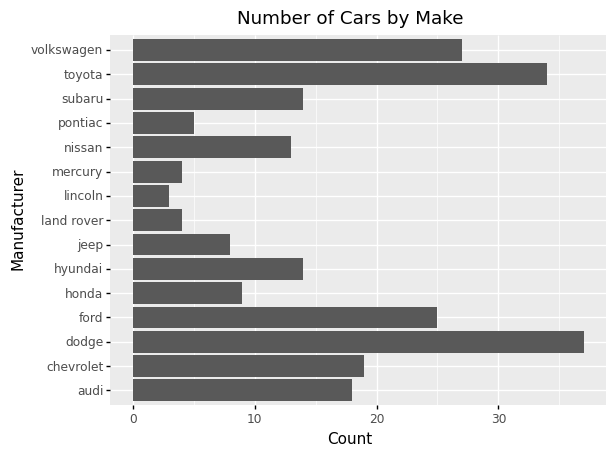

<ggplot: (97654321012345679)>

In [2]:
(ggplot(mpg)
 + aes(x='manufacturer') 
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

## Bar plot of manufacturer - Ordered by count (Categorical)

By default the discrete values along axis are ordered alphabetically. If we want a
specific ordering
we use a pandas.Categorical variable with categories ordered to our 
preference.

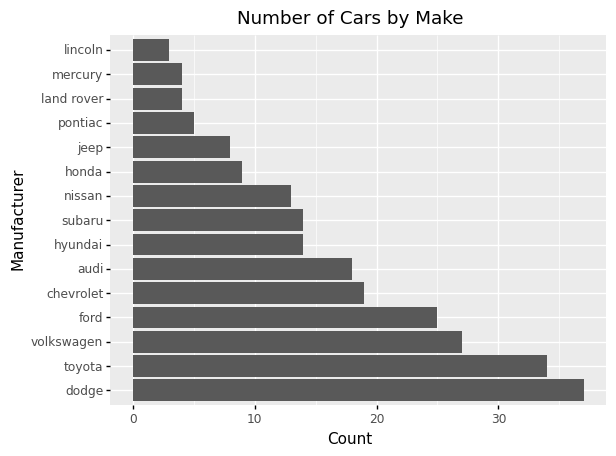

<ggplot: (97654321012345679)>

In [3]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = pd.Categorical(mpg['manufacturer'], categories=manufacturer_list)

# assign to a new column in the DataFrame
mpg = mpg.assign(manufacturer_cat = manufacturer_cat)

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

We could also modify the **existing manufacturer category** to set it as ordered
instead of having to create a new CategoricalDtype and apply that to the data.

In [4]:
mpg = mpg.assign(manufacturer_cat = 
  mpg['manufacturer'].cat.reorder_categories(manufacturer_list))

## Bar plot of manufacturer - Ordered by count (limits)

Another method to quickly reorder a discrete axis without changing the data 
is to change it's limits

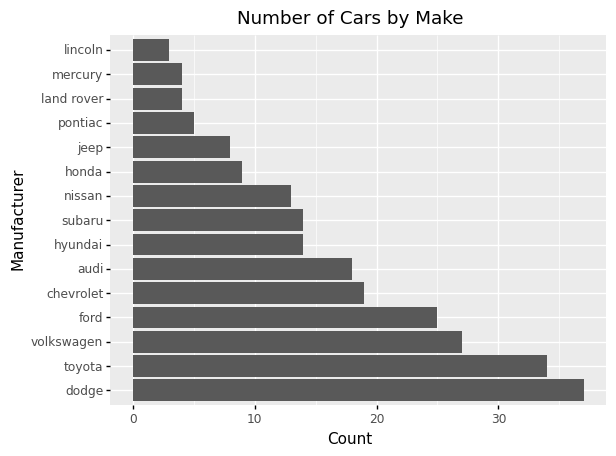

<ggplot: (97654321012345679)>

In [5]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + scale_x_discrete(limits=manufacturer_list)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

You can 'flip' an axis (independent of limits) by reversing the order of the limits.

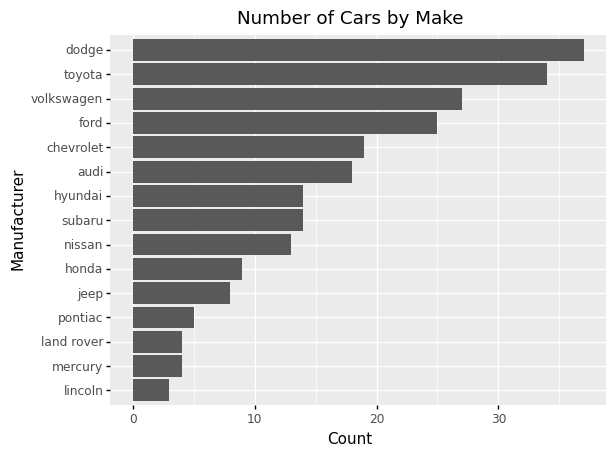

<ggplot: (97654321012345679)>

In [6]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()[::-1]

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + scale_x_discrete(limits=manufacturer_list)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

### Further Reading

+ [Pandas documentation of how to use categorical data in practice](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
+ [Pandas API Reference for categorical](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)
+ [Pandas documentation of pd.Categorical](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Categorical.html)